In [1]:
import numpy as np

# Ex 1

In [93]:
def y1(x: int):
    y = x+1
    return (x, y)

def y2(x: int):
    y = 4-x
    return (x, y)

def y3(x: int):
    y = 2*x-1
    return (x, y)

def get_direction(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    direction = np.array([x2-x1, y2-y1])
    direction = direction / np.sqrt((direction**2).sum())
    return direction


x_0 = 1
x_1 = 3
point1 = y1(x=x_0)
direction1 = get_direction(point1, y1(x_1))

point2 = y2(x=x_0)
direction2 = get_direction(point2, y2(x_1))

point3 = y3(x=x_0)
direction3 = get_direction(point3, y3(x_1))


def intersect(P0,P1):
    # generate all line direction vectors 
    n = (P1-P0)/np.linalg.norm(P1-P0,axis=1)[:,np.newaxis] # normalized
    print(n.shape)
    
    # generate the array of all projectors 
    projs = np.eye(n.shape[1]) - n[:,:,np.newaxis]*n[:,np.newaxis]  # I - n*n.T

    # generate R matrix and q vector
    R = projs.sum(axis=0)
    q = (projs @ P0[:,:,np.newaxis]).sum(axis=0)

    # solve the least squares problem for the 
    # intersection point p: Rp = q
    p = np.linalg.lstsq(R,q,rcond=None)[0]

    return p



P0 = np.array([
    point1,
    point2,
    point3
])
P1 = np.array([
    y1(x_1),
    y2(x_1),
    y3(x_1)
])



def intersect(P0,P1):
#     rot = np.array([[0, -1], [1, 0]])
    
#     for v1, v2 in zip(P0, P1):
#         normed = (v2-v1)/np.linalg.norm(v2-v1)
#         ni = rot@normed 
#         print( ni@ni.T )
        
    n = (P1-P0)/np.linalg.norm(P1-P0,axis=1)[:, np.newaxis] # normalized
    
    # generate the array of all projectors 
    projs = np.eye(n.shape[1]) - n[:,:,np.newaxis]*n[:,np.newaxis]  # I - n*n.T

    # generate R matrix and q vector
    R = projs.sum(axis=0)
    q = (projs @ P0[:,:,np.newaxis]).sum(axis=0)

    # solve the least squares problem for the 
    # intersection point p: Rp = q
    p = np.linalg.lstsq(R,q,rcond=None)[0]

    return p

intersection_point = intersect(P0, P1)

In [96]:
# intersection_point = (1.65, 2.5)

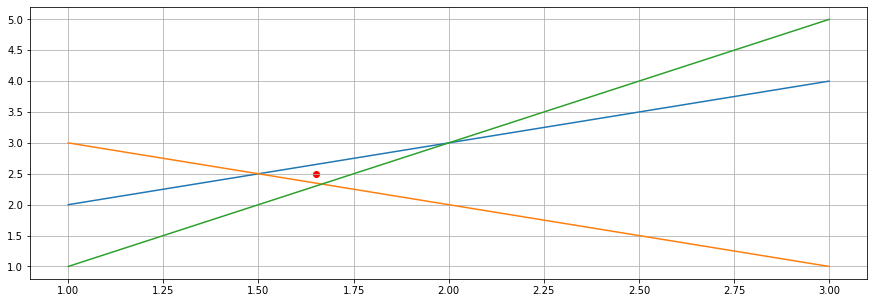

In [97]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 5))

l1 = np.array([point1, y1(x_1)])
plt.plot(l1[:, 0], l1[:, 1])

l2 = np.array([point2, y2(x_1)])
plt.plot(l2[:, 0], l2[:, 1])

l3 = np.array([point3, y3(x_1)])
plt.plot(l3[:, 0], l3[:, 1])

plt.scatter(intersection_point[0], intersection_point[1], c='r')
plt.grid()

In [98]:
intersection_point

(1.65, 2.5)

In [99]:
def dist_line1(p):
    x, y = p
    a, b, c = 1, -1, 1
    dist = np.abs(a*x+b*y+c)/np.sqrt(a**2+b**2)
    return dist

def dist_line2(p):
    x, y = p
    a, b, c = -1, -1, 4
    dist = np.abs(a*x+b*y+c)/np.sqrt(a**2+b**2)
    return dist

def dist_line3(p):
    x, y = p
    a, b, c = 2, -1, -1
    dist = np.abs(a*x+b*y+c)/np.sqrt(a**2+b**2)
    return dist

dist_line1(intersection_point), dist_line2(intersection_point), dist_line3(intersection_point)

(0.10606601717798206, 0.10606601717798238, 0.08944271909999166)

In [100]:
dist_line1(intersection_point), dist_line2(intersection_point), dist_line3(intersection_point)

(0.10606601717798206, 0.10606601717798238, 0.08944271909999166)

# Ex 2

In [3]:
vectors = np.array([
    [19, 43, 25],
    [9, 21, 15],
    [12, 29, 18],
    [21, 46, 27],
    [-4, -4, 2],
    [24, 51, 30],
    [5, 14, 11]
]).T
vectors

array([[19,  9, 12, 21, -4, 24,  5],
       [43, 21, 29, 46, -4, 51, 14],
       [25, 15, 18, 27,  2, 30, 11]])